In [2]:
import pandas as pd

# 파일 읽기
listing = pd.read_csv('listing.csv')

# 데이터 확인
print(listing.head())

   Company Name Industry Listing Date  Current Price  Price Change (%)  \
0           오토앤    자동차부품   2022-01-20         4010.0             -2.79   
1          케이옥션     판매업체   2022-01-24         3995.0              2.17   
2        애드바이오텍       제약   2022-01-24         2820.0             -0.35   
3  LG에너지솔루션(유가)     전기제품   2022-01-27       381500.0             -5.22   
4           스코넥    소프트웨어   2022-02-04         3065.0             -2.85   

   Offering Price  Change from Offering Price (%)  Opening Price  \
0          5300.0                          -24.34         8800.0   
1         20000.0                          -80.03        40000.0   
2          7000.0                          -59.71         6730.0   
3        300000.0                           27.17       597000.0   
4         13000.0                          -76.42        26000.0   

   Opening/Offering (%)  First Day Closing Price  Financial Date Annual Data  \
0                 66.04                  11400.0         2021.12  

In [8]:
import pandas as pd

listing_df = pd.read_csv('listing.csv')
sentiment_2022 = pd.read_csv('sentiment_2022_sorted.csv')
sentiment_2023 = pd.read_csv('sentiment_2023_sorted.csv')
sentiment_2024 = pd.read_csv('sentiment_2024_sorted.csv')

# Combine sentiment dataframes into one
sentiment_df = pd.concat([sentiment_2022, sentiment_2023, sentiment_2024])

listing_df['Listing Date'] = pd.to_datetime(listing_df['Listing Date'])
sentiment_df['Month'] = pd.to_datetime(sentiment_df['Month'])

# Extract year and month from 'Listing Date' in listing_df
listing_df['YearMonth'] = listing_df['Listing Date'].dt.to_period('M')

# Extract year and month from 'date' in sentiment_df
sentiment_df['YearMonth'] = sentiment_df['Month'].dt.to_period('M')

# Merge the dataframes on 'YearMonth'
listing_df = listing_df.merge(sentiment_df[['YearMonth', 'Sentiment_Score']], on='YearMonth', how='left')

# Drop the redundant 'YearMonth' column
listing_df.drop(columns=['YearMonth'], inplace=True)

output_path = 'listing_with_sentiment.csv'
listing_df.to_csv(output_path, index=False)

print(f"결과 파일이 저장되었습니다: {output_path}")

결과 파일이 저장되었습니다: listing_with_sentiment.csv


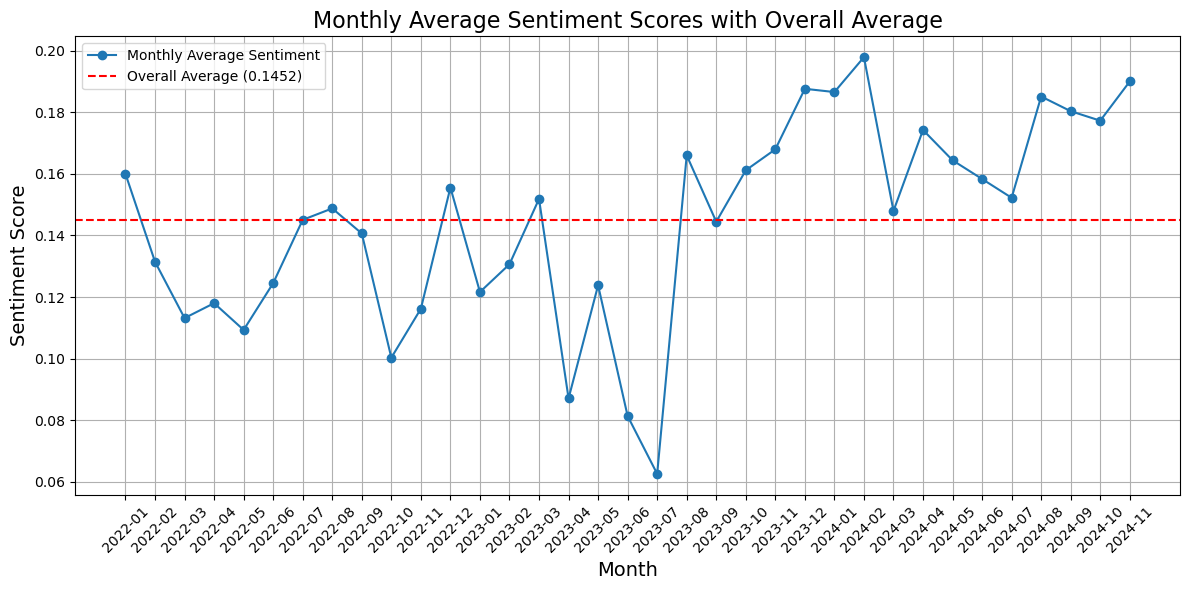

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 불러오기
data = pd.read_csv('listing_with_sentiment.csv')

# Listing Date를 날짜 형식으로 변환
data["Listing Date"] = pd.to_datetime(data["Listing Date"], errors="coerce")

# 월별 평균 계산
data["Year-Month"] = data["Listing Date"].dt.to_period("M")  # 연도-월 추출
monthly_avg_sentiment = data.groupby("Year-Month")["Sentiment_Score"].mean()

# 전체 평균 계산
overall_average = data["Sentiment_Score"].mean()

# 그래프 생성
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_sentiment.index.astype(str), monthly_avg_sentiment.values, marker='o', label="Monthly Average Sentiment")
plt.axhline(y=overall_average, color='r', linestyle='--', label=f'Overall Average ({overall_average:.4f})')

# 그래프 제목 및 레이블
plt.title("Monthly Average Sentiment Scores with Overall Average", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Sentiment Score", fontsize=14)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()

# 그래프 표시
plt.show()


상관계수 행렬:
                         Operating Profit Margin  Quick Ratio       ROE  \
Operating Profit Margin                 1.000000    -0.053293  0.012741   
Quick Ratio                            -0.053293     1.000000 -0.034879   
ROE                                     0.012741    -0.034879  1.000000   
Debt Ratio                              0.280346    -0.112562  0.090798   
EPS                                     0.085100    -0.160045  0.077882   
Competition Rate                       -0.039659    -0.024740  0.041458   
Interest Rate                           0.000440     0.074726 -0.036887   
Sentiment_Score                         0.112679     0.052260 -0.165204   

                         Debt Ratio       EPS  Competition Rate  \
Operating Profit Margin    0.280346  0.085100         -0.039659   
Quick Ratio               -0.112562 -0.160045         -0.024740   
ROE                        0.090798  0.077882          0.041458   
Debt Ratio                 1.000000 -0.104445 

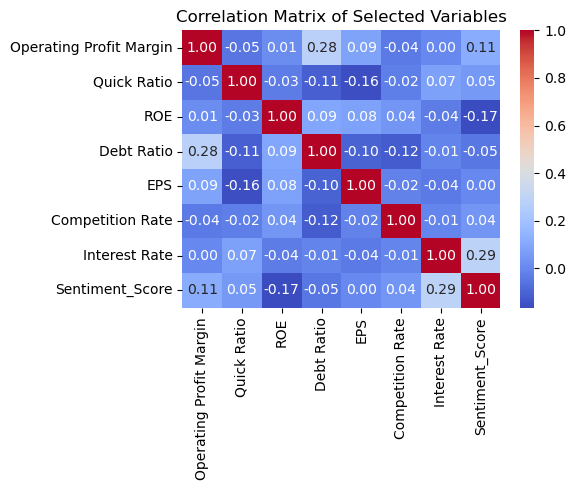

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 분석할 열 목록
columns_to_analyze = [
    "Operating Profit Margin", "Quick Ratio", "ROE", "Debt Ratio",
    "EPS", "Competition Rate", "Interest Rate", "Sentiment_Score"
]

# 상관계수 행렬 계산
correlation_matrix = data[columns_to_analyze].corr()

# 상관계수 행렬 출력
print("\n상관계수 행렬:")
print(correlation_matrix)

# 상관계수 행렬 시각화 (크기 줄이기)
plt.figure(figsize=(6, 5))  # 가로 6, 세로 5로 크기 조정
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Selected Variables")
plt.tight_layout()  # 레이아웃 자동 조정
plt.show()

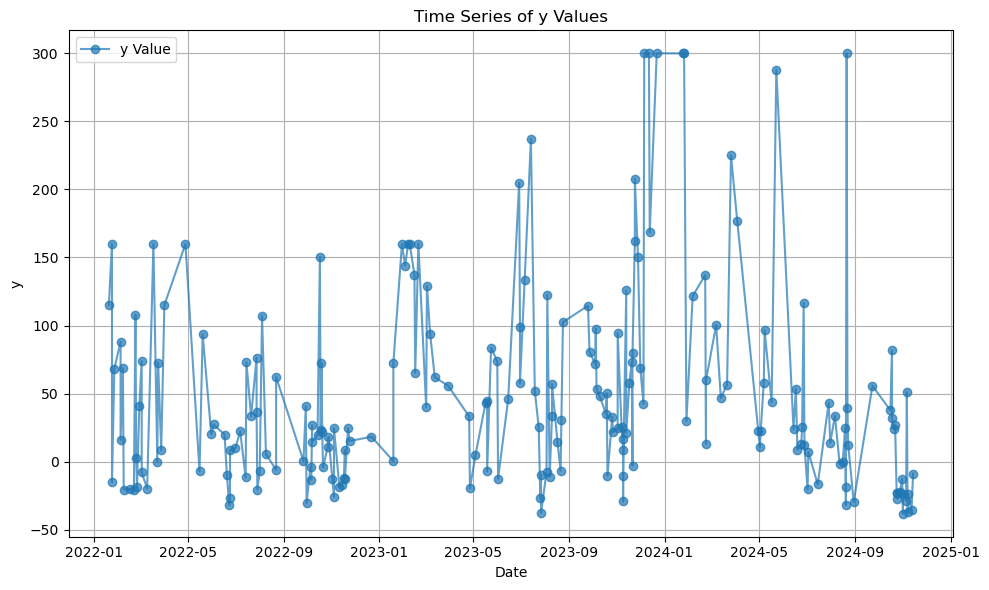

In [13]:
def plot_y_time_series(data, date_column):
    """
    y 값의 변화 추이를 시계열로 시각화하는 함수
    :param data: 데이터프레임 (DataFrame)
    :param date_column: 날짜 열의 이름 (예: 'Date')
    """
    # 날짜 데이터를 시간 형식으로 변환
    data[date_column] = pd.to_datetime(data[date_column])

    # 날짜를 기준으로 정렬
    data = data.sort_values(by=date_column)

    # y 값 시계열 그래프
    plt.figure(figsize=(10, 6))
    plt.plot(data[date_column], data['y'], marker='o', linestyle='-', alpha=0.7, label='y Value')
    plt.title('Time Series of y Values')
    plt.xlabel('Date')
    plt.ylabel('y')
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()

# 시계열 그래프 호출 (listing 데이터 사용, 'Date' 열 가정)
plot_y_time_series(data, date_column='Listing Date')

전체 데이터에 대한 회귀 분석:

회귀 분석 결과:
                  Variable  Coefficient
0  Operating Profit Margin     3.027174
1              Quick Ratio    -1.422676
2                      ROE    -2.087165
3                      EPS     8.528826
4         Competition Rate    40.356247
5            Interest Rate    11.774443

절편 (Intercept): 48.152844492670916

평균 제곱 오차 (MSE): 5683.6460249889915
결정계수 (R^2): 0.24355651091773234


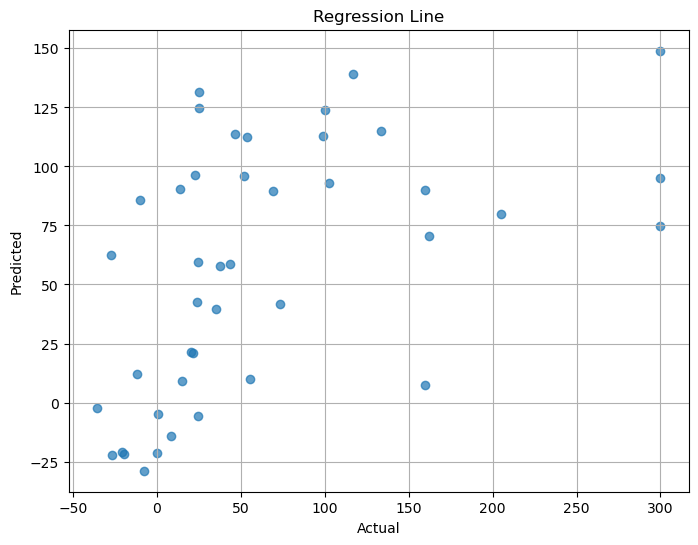

In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 독립 변수 설정
independent_vars = [
    "Operating Profit Margin", "Quick Ratio", "ROE",
    "EPS", "Competition Rate", "Interest Rate"
]

# 회귀 분석 함수 정의
def regression_analysis(data, independent_vars):
    # 결측치 처리 (독립 변수와 종속 변수)
    data = data.copy()  # 원본 데이터 변경 방지
    data[independent_vars] = data[independent_vars].fillna(data[independent_vars].mean())  # 독립 변수 결측치 처리
    data['y'] = data['y'].fillna(data['y'].mean())  # 종속 변수 결측치 처리

    # 독립 변수와 종속 변수 분리
    X = data[independent_vars]
    y = data['y']

    # 데이터 표준화
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 훈련 세트와 테스트 세트 분리
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # 선형 회귀 모델 생성 및 학습
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 회귀 계수 출력
    coefficients = pd.DataFrame({
        'Variable': independent_vars,
        'Coefficient': model.coef_
    })

    print("\n회귀 분석 결과:")
    print(coefficients)
    print("\n절편 (Intercept):", model.intercept_)

    # 테스트 데이터로 예측
    y_pred = model.predict(X_test)

    # 모델 평가
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n평균 제곱 오차 (MSE):", mse)
    print("결정계수 (R^2):", r2)

    # 회귀 직선 그래프
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.title('Regression Line')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid()
    plt.show()

    return coefficients, model.intercept_, mse, r2

# 전체 데이터에 대한 회귀 분석
print("전체 데이터에 대한 회귀 분석:")
coefficients, intercept, mse, r2 = regression_analysis(listing, independent_vars)

긍정 데이터에 대한 회귀 분석:

회귀 분석 결과:
                  Variable  Coefficient
0  Operating Profit Margin     1.322307
1              Quick Ratio    -4.591703
2                      ROE     5.270345
3                      EPS    12.664810
4         Competition Rate    43.939850
5            Interest Rate    -1.317747

절편 (Intercept): 55.469252451480195

평균 제곱 오차 (MSE): 3308.8837501409967
결정계수 (R^2): 0.28359429047066376


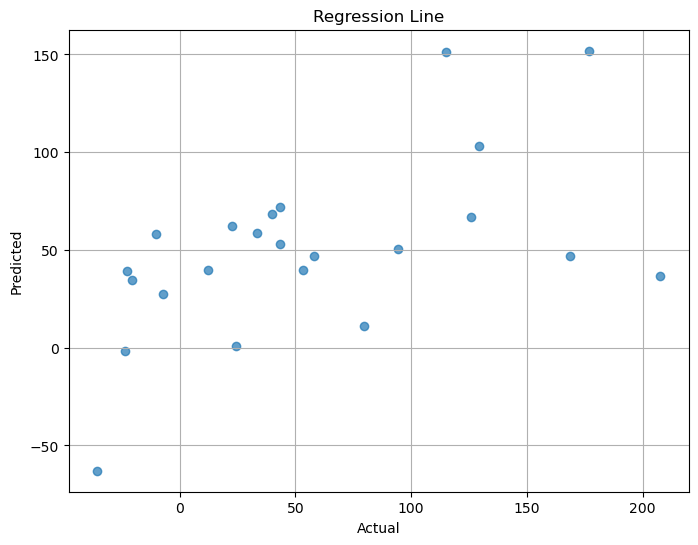


부정 데이터에 대한 회귀 분석:

회귀 분석 결과:
                  Variable  Coefficient
0  Operating Profit Margin     7.237246
1              Quick Ratio     4.881712
2                      ROE    -9.731709
3                      EPS    -0.688865
4         Competition Rate    38.442995
5            Interest Rate    19.275998

절편 (Intercept): 41.094762980659524

평균 제곱 오차 (MSE): 1595.7088317846376
결정계수 (R^2): 0.6120980781576011


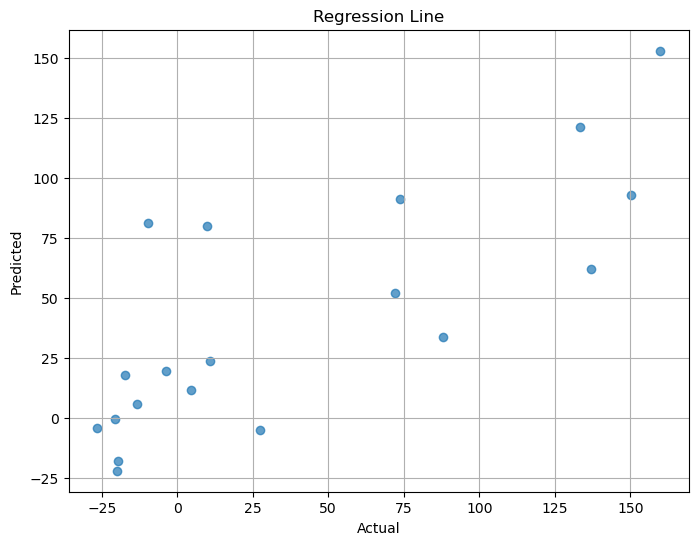

In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 독립 변수 설정
independent_vars = [
    "Operating Profit Margin", "Quick Ratio", "ROE",
    "EPS", "Competition Rate", "Interest Rate"
]

# 회귀 분석 함수 정의
def regression_analysis(data, independent_vars):
    # 결측치 처리 (독립 변수와 종속 변수)
    data = data.copy()  # 원본 데이터 변경 방지
    data[independent_vars] = data[independent_vars].fillna(data[independent_vars].mean())  # 독립 변수 결측치 처리
    data['y'] = data['y'].fillna(data['y'].mean())  # 종속 변수 결측치 처리

    # 독립 변수와 종속 변수 분리
    X = data[independent_vars]
    y = data['y']

    # 데이터 표준화
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 훈련 세트와 테스트 세트 분리
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # 선형 회귀 모델 생성 및 학습
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 회귀 계수 출력
    coefficients = pd.DataFrame({
        'Variable': independent_vars,
        'Coefficient': model.coef_
    })

    print("\n회귀 분석 결과:")
    print(coefficients)
    print("\n절편 (Intercept):", model.intercept_)

    # 테스트 데이터로 예측
    y_pred = model.predict(X_test)

    # 모델 평가
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n평균 제곱 오차 (MSE):", mse)
    print("결정계수 (R^2):", r2)

    # 회귀 직선 그래프
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.title('Regression Line')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid()
    plt.show()

    return coefficients, model.intercept_, mse, r2

# 데이터 분할
threshold = 0.1453
positive_data = data[data["Sentiment_Score"] > threshold]  # Sentiment_Score > 0.1453
negative_data = data[data["Sentiment_Score"] <= threshold]  # Sentiment_Score <= 0.1453

# 긍정 데이터에 대한 회귀 분석
print("긍정 데이터에 대한 회귀 분석:")
coefficients_positive, intercept_positive, mse_positive, r2_positive = regression_analysis(positive_data, independent_vars)

# 부정 데이터에 대한 회귀 분석
print("\n부정 데이터에 대한 회귀 분석:")
coefficients_negative, intercept_negative, mse_negative, r2_negative = regression_analysis(negative_data, independent_vars)


로지스틱 회귀 분석 결과:
                  Variable  Coefficient
0  Operating Profit Margin     0.716606
1              Quick Ratio     0.346764
2                      ROE     0.367396
3                      EPS     0.190005
4         Competition Rate     1.946237
5            Interest Rate     0.088991

절편 (Intercept): 1.6120090599605916

정확도 (Accuracy): 0.8333333333333334

혼동 행렬 (Confusion Matrix):
 [[ 7  2]
 [ 5 28]]

분류 보고서 (Classification Report):
               precision    recall  f1-score   support

           0       0.58      0.78      0.67         9
           1       0.93      0.85      0.89        33

    accuracy                           0.83        42
   macro avg       0.76      0.81      0.78        42
weighted avg       0.86      0.83      0.84        42



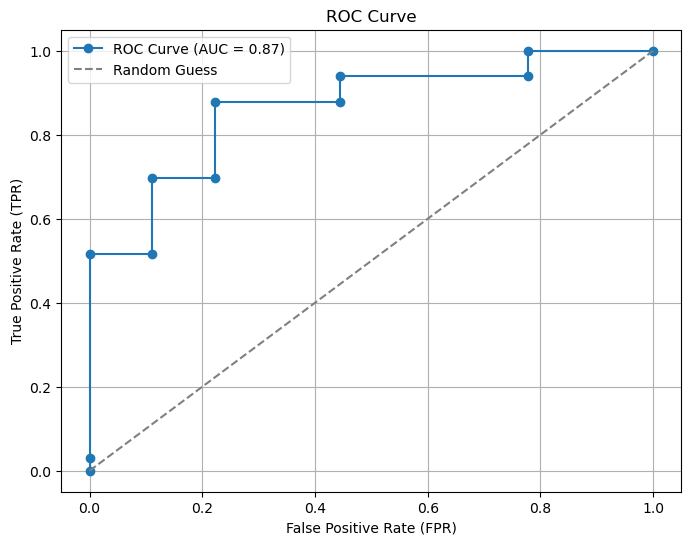


전체 데이터의 회귀 계수 리스트:
[0.7166057718416421, 0.3467635743840315, 0.36739552646839385, 0.190005150700918, 1.9462368244578983, 0.08899141533300628]

모델 절편 (Intercept): 1.6120090599605916

정확도 (Accuracy): 0.8333333333333334

ROC AUC Score: 0.8653198653198654


In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# 독립 변수 설정
independent_vars = [
    "Operating Profit Margin", "Quick Ratio", "ROE",
    "EPS", "Competition Rate", "Interest Rate"
]

# 로지스틱 회귀 분석 함수
def logistic_regression_analysis(data):
    X = data[independent_vars]  # 독립 변수
    y = data['y']  # 종속 변수

    # 종속 변수 이진화
    y_binary = (y > 0).astype(int)  # y > 0이면 1, 아니면 0

    # 결측치 처리 (독립 변수 평균값으로 대체)
    X = X.fillna(X.mean())

    # 데이터 표준화
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 훈련 세트와 테스트 세트 분리
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binary, test_size=0.2, random_state=42)

    # 로지스틱 회귀 모델 생성 및 학습
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # 회귀 계수 출력
    coefficients = pd.DataFrame({
        'Variable': independent_vars,
        'Coefficient': model.coef_[0]
    })

    print("\n로지스틱 회귀 분석 결과:")
    print(coefficients)
    print("\n절편 (Intercept):", model.intercept_[0])

    # 테스트 데이터로 예측
    y_pred = model.predict(X_test)

    # 모델 평가
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print("\n정확도 (Accuracy):", accuracy)
    print("\n혼동 행렬 (Confusion Matrix):\n", cm)
    print("\n분류 보고서 (Classification Report):\n", report)

    # ROC 곡선 그리기
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, marker='o', label=f"ROC Curve (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label="Random Guess")
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend()
    plt.grid()
    plt.show()

    return coefficients, model.intercept_[0], accuracy, auc_score

# 전체 데이터에 대해 로지스틱 회귀 분석
coefficients, intercept, accuracy, auc = logistic_regression_analysis(listing)

# 계수를 저장할 리스트
coefficients_list = coefficients['Coefficient'].tolist()

# 결과 출력
print("\n전체 데이터의 회귀 계수 리스트:")
print(coefficients_list)

print("\n모델 절편 (Intercept):", intercept)
print("\n정확도 (Accuracy):", accuracy)
print("\nROC AUC Score:", auc)


로지스틱 회귀 분석 결과 (Sentiment Score > 0.1453):
                  Variable  Coefficient
0  Operating Profit Margin     0.346128
1              Quick Ratio     0.086623
2                      ROE     0.361540
3                      EPS     0.176560
4         Competition Rate     1.770914
5            Interest Rate     0.016927

절편 (Intercept): 1.6823990046762338

정확도 (Accuracy): 0.782608695652174

혼동 행렬 (Confusion Matrix):
 [[ 3  3]
 [ 2 15]]

분류 보고서 (Classification Report):
               precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       0.83      0.88      0.86        17

    accuracy                           0.78        23
   macro avg       0.72      0.69      0.70        23
weighted avg       0.77      0.78      0.78        23



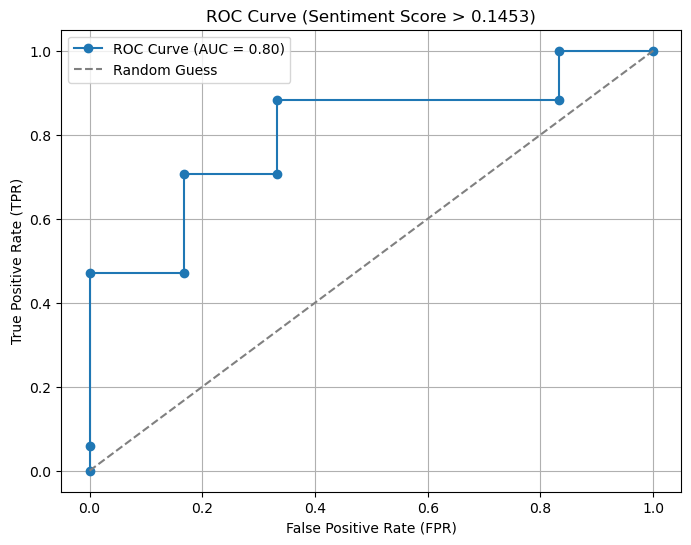


로지스틱 회귀 분석 결과 (Sentiment Score <= 0.1453):
                  Variable  Coefficient
0  Operating Profit Margin     0.419920
1              Quick Ratio     0.841248
2                      ROE     0.102728
3                      EPS    -0.169344
4         Competition Rate     2.053128
5            Interest Rate     0.445013

절편 (Intercept): 1.7443426046882247

정확도 (Accuracy): 0.8947368421052632

혼동 행렬 (Confusion Matrix):
 [[ 6  2]
 [ 0 11]]

분류 보고서 (Classification Report):
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.85      1.00      0.92        11

    accuracy                           0.89        19
   macro avg       0.92      0.88      0.89        19
weighted avg       0.91      0.89      0.89        19



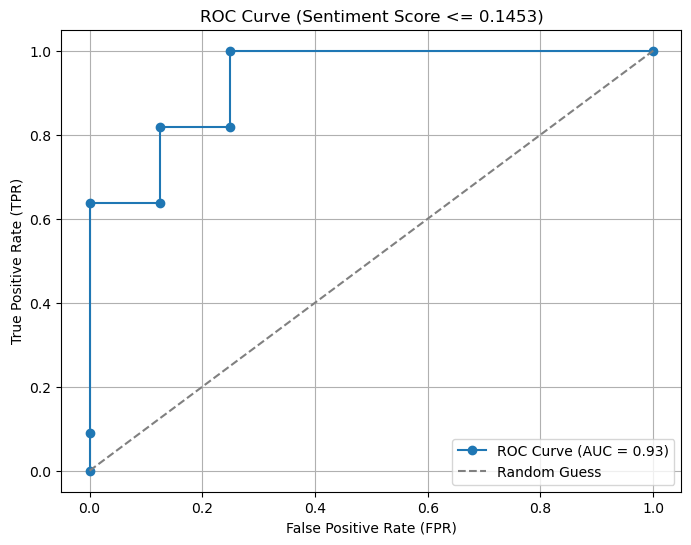


Sentiment Score > 0.1453의 회귀 계수 리스트:
[0.34612751897925076, 0.08662276672566874, 0.36154035783220373, 0.17655990920286252, 1.770914026593603, 0.016927027236216568]

Sentiment Score <= 0.1453의 회귀 계수 리스트:
[0.4199198383173402, 0.8412481498702719, 0.10272750426305144, -0.16934367921471644, 2.0531284022845044, 0.44501312510443153]


In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 독립 변수 설정
independent_vars = [
    "Operating Profit Margin", "Quick Ratio", "ROE",
    "EPS", "Competition Rate", "Interest Rate"
]

# "Sentiment_Score" 기준으로 데이터 분할
threshold = 0.1453
positive_data = data[data["Sentiment_Score"] > threshold]  # Sentiment_Score > 0.1453
negative_data = data[data["Sentiment_Score"] <= threshold]  # Sentiment_Score <= 0.1453

# 공통 함수: 데이터 분리, 표준화 및 로지스틱 회귀 분석
def logistic_regression_analysis(data, title):
    X = data[independent_vars]  # 독립 변수
    y = data['y']  # 종속 변수

    # 종속 변수 이진화
    y_binary = (y > 0).astype(int)  # y > 0이면 1, 아니면 0

    # 결측치 처리 (독립 변수 평균값으로 대체)
    X = X.fillna(X.mean())

    # 데이터 표준화
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 훈련 세트와 테스트 세트 분리
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binary, test_size=0.2, random_state=42)

    # 로지스틱 회귀 모델 생성 및 학습
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # 회귀 계수 출력
    coefficients = pd.DataFrame({
        'Variable': independent_vars,
        'Coefficient': model.coef_[0]
    })

    print(f"\n로지스틱 회귀 분석 결과 ({title}):")
    print(coefficients)
    print("\n절편 (Intercept):", model.intercept_[0])

    # 테스트 데이터로 예측
    y_pred = model.predict(X_test)

    # 모델 평가
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print("\n정확도 (Accuracy):", accuracy)
    print("\n혼동 행렬 (Confusion Matrix):\n", cm)
    print("\n분류 보고서 (Classification Report):\n", report)

    # ROC 곡선 그리기
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, marker='o', label=f"ROC Curve (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label="Random Guess")
    plt.title(f'ROC Curve ({title})')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend()
    plt.grid()
    plt.show()

    return coefficients, model.intercept_[0], accuracy, auc_score

# "Sentiment_Score > 0.1453" 데이터에 대해 로지스틱 회귀 분석
positive_coefficients, positive_intercept, positive_accuracy, positive_auc = logistic_regression_analysis(
    positive_data, "Sentiment Score > 0.1453"
)

# "Sentiment_Score <= 0.1453" 데이터에 대해 로지스틱 회귀 분석
negative_coefficients, negative_intercept, negative_accuracy, negative_auc = logistic_regression_analysis(
    negative_data, "Sentiment Score <= 0.1453"
)

# 계수를 저장할 리스트 초기화
positive_coefficients_list = positive_coefficients['Coefficient'].tolist()  # 양수 그룹 계수 리스트
negative_coefficients_list = negative_coefficients['Coefficient'].tolist()  # 음수 그룹 계수 리스트

# 결과 출력
print("\nSentiment Score > 0.1453의 회귀 계수 리스트:")
print(positive_coefficients_list)

print("\nSentiment Score <= 0.1453의 회귀 계수 리스트:")
print(negative_coefficients_list)

In [20]:
import pandas as pd
import numpy as np

# 주어진 회귀 계수와 절편
coefficients_positive = [0.34601127142626126, 0.0862336629295, 0.36155132484207153, 0.1764705966211338, 1.7710943257305274, 0.01667334926416129]
coefficients_negative = [0.4002871100790946, 0.9159459614444292, 0.552014436822027, -0.032642983190859266, 2.1184943367664664, 0.45098943453844975]
intercept_positive = 1.682409795794631  # 절편 값
intercept_negative = 1.832090783909714  # 절편 값

# 독립 변수 열 이름
independent_vars = [
    "Operating Profit Margin", "Quick Ratio", "ROE",
    "EPS", "Competition Rate", "Interest Rate"
]

# 회귀식 계산 함수 정의
def calculate_regression(row, coefficients, intercept):
    """
    특정 행(row)에 대해 회귀식을 계산합니다.
    """
    return np.dot(coefficients, row[independent_vars]) + intercept

# 로지스틱 함수 적용
def logistic_function(z):
    """
    로지스틱 함수를 적용하여 확률값 계산.
    """
    return 1 / (1 + np.exp(-z))

# 독립 변수 표준화
for var in independent_vars:
    mean = data[var].mean()
    std = data[var].std()
    data[var] = (data[var] - mean) / std  # 표준화: (값 - 평균) / 표준편차

# 각 데이터에 대해 회귀식 결과값 계산 및 로지스틱 함수 적용
def apply_regression(row):
    if row['Sentiment_Score'] > 0.1453:
        # Sentiment Score > 0.1453
        z = calculate_regression(row, coefficients_positive, intercept_positive)
    else:
        # Sentiment Score <= 0.1453
        z = calculate_regression(row, coefficients_negative, intercept_negative)
    return z

# 회귀 결과값 추가
data['Regression_Result'] = data.apply(apply_regression, axis=1)

# 로지스틱 함수 적용하여 확률값 추가
data['Predicted_Probability'] = data['Regression_Result'].apply(logistic_function)

# 결과를 새로운 엑셀 파일로 저장
output_file_path = 'listing_with_Prediction.csv'  # 저장할 파일 경로
data.to_csv(output_file_path, index=False)

print(f"결과 파일이 저장되었습니다: {output_file_path}")

결과 파일이 저장되었습니다: listing_with_Prediction.csv


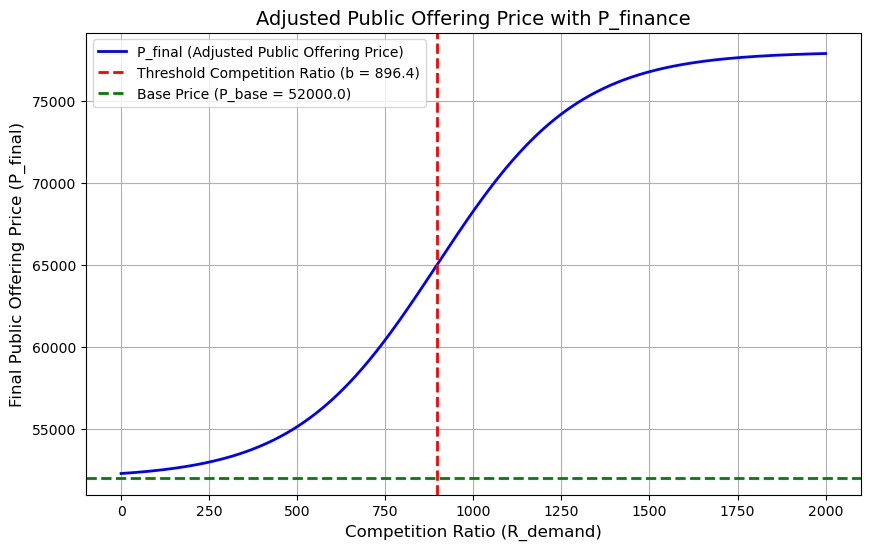

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def plot_public_offering_price(P_finance, a=0.005, b=896.4):
    """
    P_finance 값을 기반으로 P_base를 계산하고, 공모가 조정 그래프를 그리는 함수.

    Parameters:
    - P_finance: float, 입력된 금융 데이터
    - a: float, 민감도 (기본값: 0.01)
    - b: float, 기준 경쟁률 (기본값: 896.4)
    """
    # P_base 계산
    P_base = 0.8 * P_finance

    # R_demand 값 설정 (0부터 2000까지의 범위)
    R_demand = np.linspace(0, 2000, 500)

    # P_final 계산 (수식 적용)
    P_final = P_base * (1 + 0.5 / (1 + np.exp(-a * (R_demand - b))))

    # 그래프 그리기
    plt.figure(figsize=(10, 6))
    plt.plot(R_demand, P_final, color="blue", label="P_final (Adjusted Public Offering Price)", linewidth=2)
    plt.axvline(x=b, color="red", linestyle="--", label=f"Threshold Competition Ratio (b = {b})", linewidth=2)
    plt.axhline(y=P_base, color="green", linestyle="--", label=f"Base Price (P_base = {P_base})", linewidth=2)

    # 그래프 제목과 레이블 설정
    plt.title("Adjusted Public Offering Price with P_finance", fontsize=14)
    plt.xlabel("Competition Ratio (R_demand)", fontsize=12)
    plt.ylabel("Final Public Offering Price (P_final)", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

# 예시: P_finance 값을 60000으로 설정하여 그래프를 그리기
P_finance_input = 65000  # 입력된 금융 데이터 값
plot_public_offering_price(P_finance_input)

In [24]:
import numpy as np

def calculate_final_price(R_demand, P_finance, a=0.005, b=896.4):
    """
    특정 경쟁률 R_demand에서 조정된 공모가 P_final을 계산하는 함수.

    Parameters:
    - R_demand: float, 입력된 경쟁률
    - P_finance: float, 입력된 금융 데이터
    - a: float, 민감도 (기본값: 0.04)
    - b: float, 기준 경쟁률 (기본값: 896.4)

    Returns:
    - P_final: float, 계산된 조정된 공모가
    """
    # P_base 계산
    P_base = 0.8 * P_finance

    # P_final 계산 (수식 적용)
    P_final = P_base * (1 + 0.5 / (1 + np.exp(-a * (R_demand - b))))

    return P_final

# 사용자 입력 예시
P_finance_input = 65000  # 금융 데이터 값
R_demand_input = 1049.36  # 경쟁률 입력

# 조정된 공모가 계산
P_final_result = calculate_final_price(R_demand_input, P_finance_input)

print(f"입력된 경쟁률 R_demand = {R_demand_input}에서 조정된 공모가 P_final = {P_final_result}")

입력된 경쟁률 R_demand = 1049.36에서 조정된 공모가 P_final = 69742.26889132046
